# Introduction to Machine Learning Final Project - Fraud Transactions Detection

## Agampreet Bajaj

# Data Visualization and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use("default")
plt.rcParams["figure.figsize"] = (8, 5)

In [3]:
df = pd.read_csv("transactions.csv")

In [5]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
display(df.head())

Shape: (299695, 17)

Columns: ['transaction_id', 'user_id', 'account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount', 'country', 'bin_country', 'channel', 'merchant_category', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag', 'transaction_time', 'shipping_distance_km', 'is_fraud']


,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [38]:
print("Info:")
print(df.info())

print("Summary statistics (numeric columns):")
display(df.describe())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   account_age_days         299695 non-null  int64  
 1   total_transactions_user  299695 non-null  int64  
 2   avg_amount_user          299695 non-null  float64
 3   amount                   299695 non-null  float64
 4   country                  299695 non-null  object 
 5   bin_country              299695 non-null  object 
 6   channel                  299695 non-null  object 
 7   merchant_category        299695 non-null  object 
 8   promo_used               299695 non-null  int64  
 9   avs_match                299695 non-null  int64  
 10  cvv_result               299695 non-null  int64  
 11  three_ds_flag            299695 non-null  int64  
 12  shipping_distance_km     299695 non-null  float64
 13  is_fraud                 299695 non-null  int64  
 14

,account_age_days,total_transactions_user,avg_amount_user,amount,promo_used,avs_match,cvv_result,three_ds_flag,shipping_distance_km,is_fraud,hour,dayofweek
count,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000,299695.000000
mean,973.397871,50.673321,148.142973,177.165279,0.153640,0.837999,0.872110,0.784588,357.049028,0.022062,11.510546,2.972215
std,525.241409,5.976391,200.364624,306.926507,0.360603,0.368453,0.333968,0.411109,427.672074,0.146887,6.926067,1.999140
min,1.000000,40.000000,3.520000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,516.000000,46.000000,46.190000,42.100000,0.000000,1.000000,1.000000,1.000000,136.600000,0.000000,5.000000,1.000000
50%,975.000000,51.000000,90.130000,89.990000,0.000000,1.000000,1.000000,1.000000,273.020000,0.000000,12.000000,3.000000
75%,1425.000000,56.000000,173.450000,191.110000,0.000000,1.000000,1.000000,1.000000,409.180000,0.000000,18.000000,5.000000
max,1890.000000,60.000000,4565.290000,16994.740000,1.000000,1.000000,1.000000,1.000000,3748.560000,1.000000,23.000000,6.000000


## Class Distribution (is_fraud)

In [39]:
class_counts = df["is_fraud"].value_counts().sort_index()
class_percent = class_counts / len(df) * 100

print("Class counts:")
print(class_counts)
print("Class percentages:")
print(class_percent)

Class counts:
is_fraud
0    293083
1      6612
Name: count, dtype: int64
Class percentages:
is_fraud
0    97.793757
1     2.206243
Name: count, dtype: float64


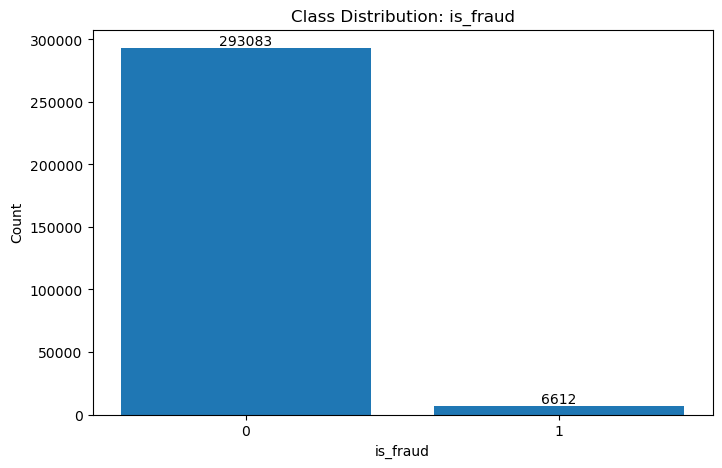

In [8]:
plt.figure()
plt.bar(class_counts.index.astype(str), class_counts.values)
plt.title("Class Distribution: is_fraud")
plt.xlabel("is_fraud")
plt.ylabel("Count")
for i, v in enumerate(class_counts.values):
    plt.text(i, v, f"{v}", ha="center", va="bottom")
plt.show()

## Histograms of Numeric Features

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['transaction_id', 'user_id', 'account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag', 'shipping_distance_km', 'is_fraud']


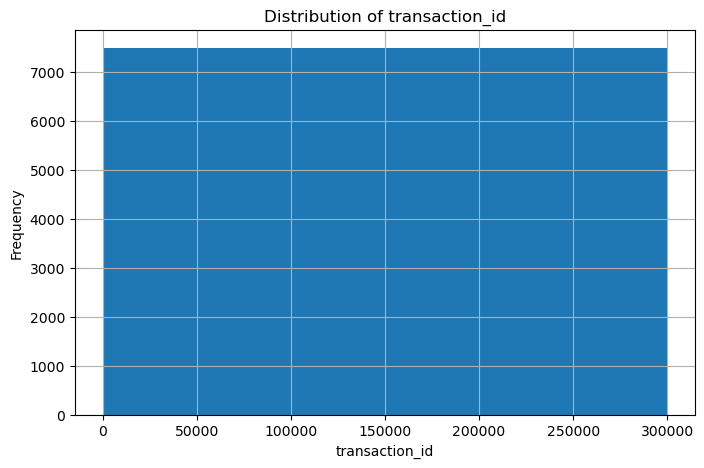

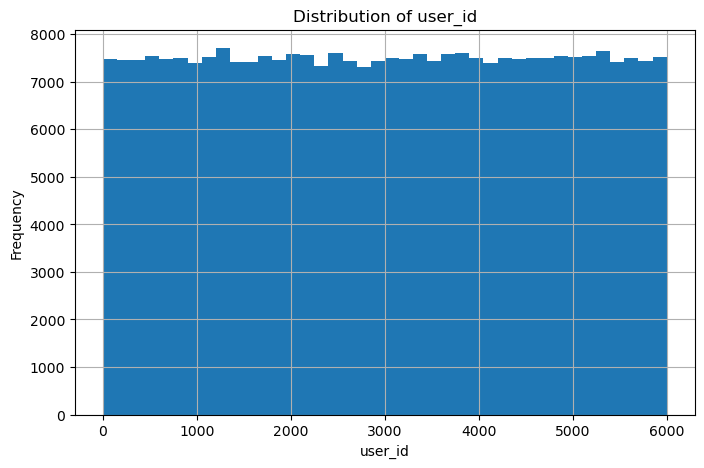

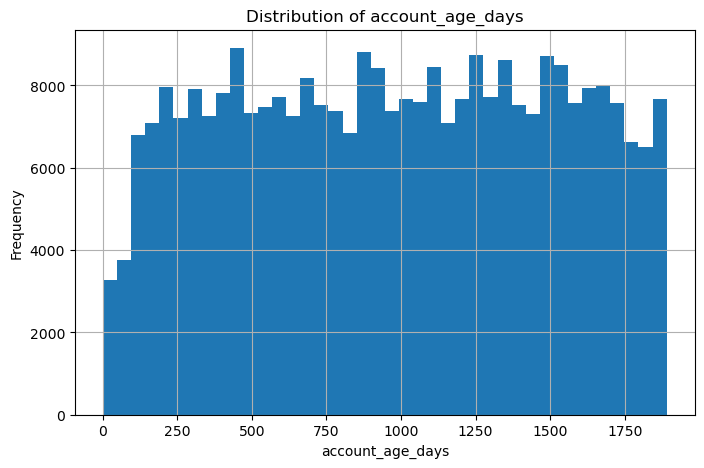

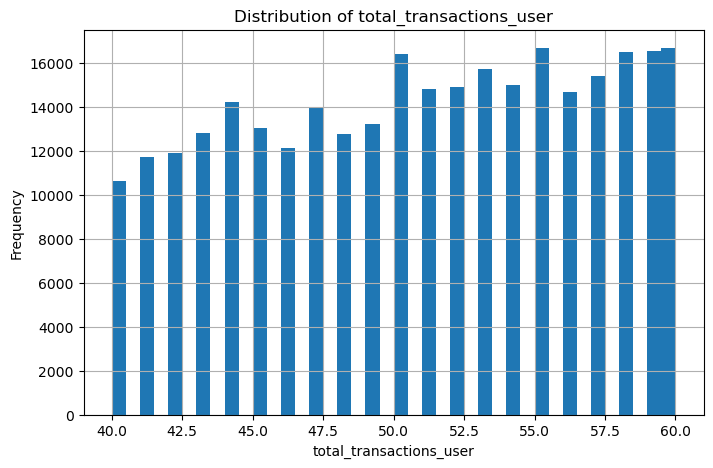

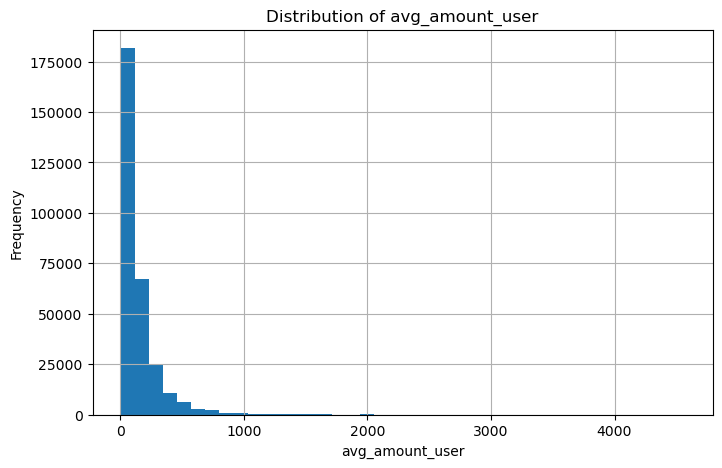

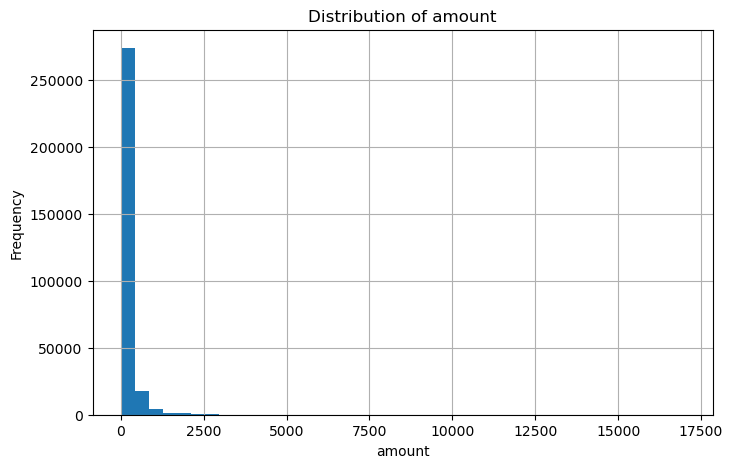

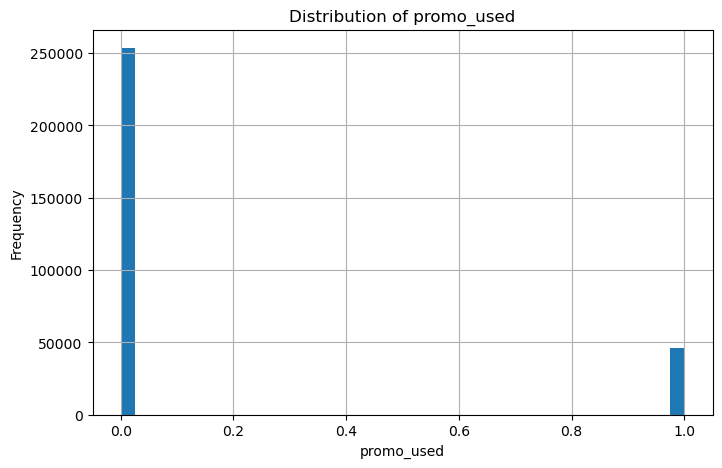

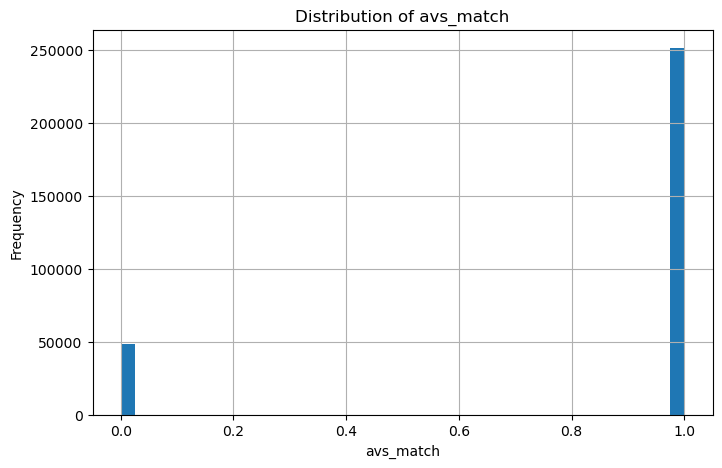

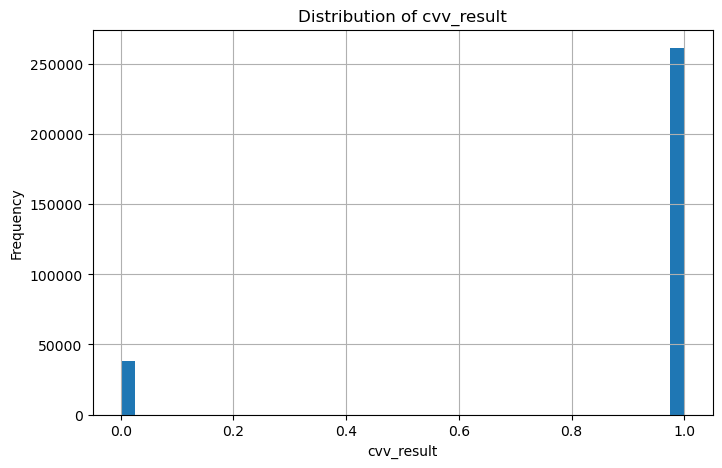

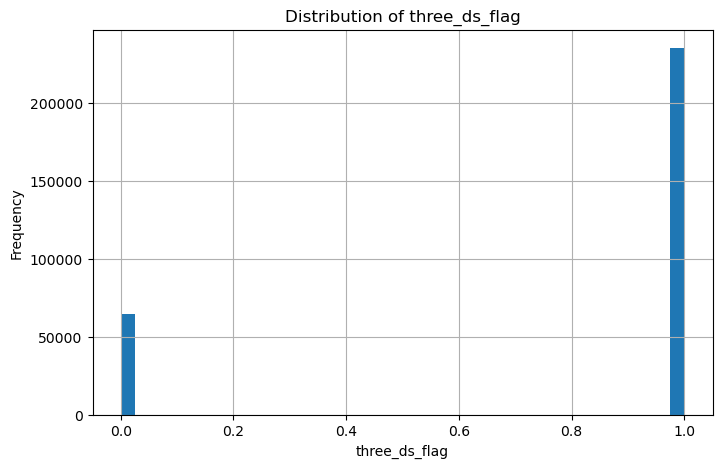

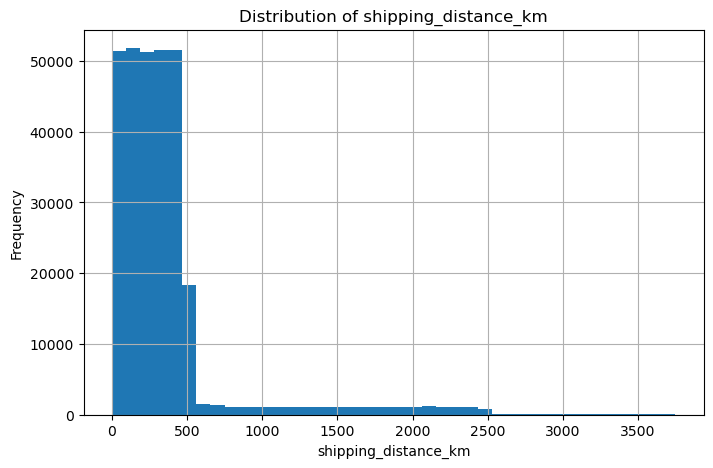

In [11]:
if "is_fraud" in numeric_cols:
    numeric_cols.remove("is_fraud")
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Amount vs. Fraud Status

<Figure size 800x500 with 0 Axes>

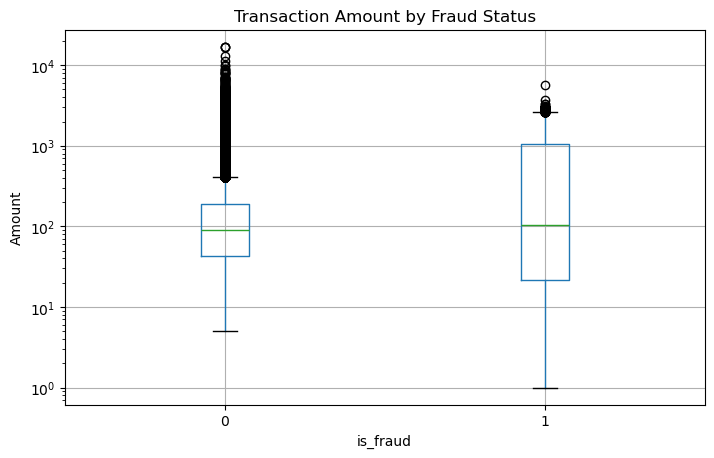

In [12]:
plt.figure()
df.boxplot(column="amount", by="is_fraud")
plt.title("Transaction Amount by Fraud Status")
plt.suptitle("")
plt.xlabel("is_fraud")
plt.ylabel("Amount")
plt.yscale("log")
plt.show()

## Fraud Rate by Channel

Fraud rate by channel:


,fraud_rate,num_transactions
channel,,
web,0.035644,152226
app,0.008042,147469


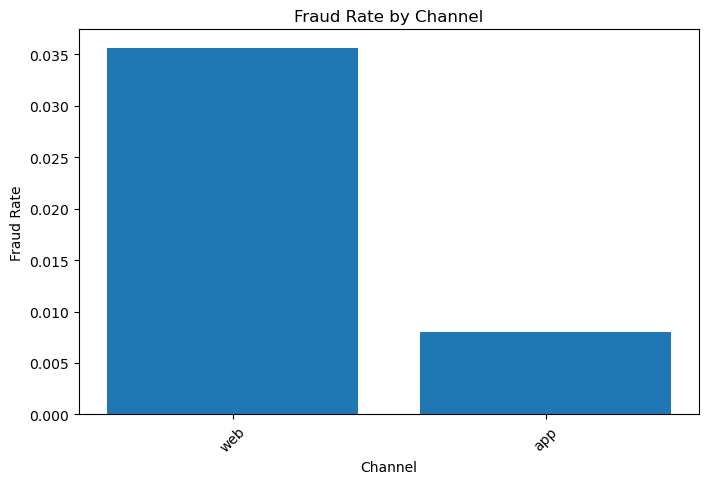

In [13]:
if "channel" in df.columns:
    channel_stats = (
        df.groupby("channel")["is_fraud"]
          .agg(["mean", "count"])
          .rename(columns={"mean": "fraud_rate", "count": "num_transactions"})
          .sort_values("fraud_rate", ascending=False)
    )

    print("Fraud rate by channel:")
    display(channel_stats)

    plt.figure()
    plt.bar(channel_stats.index.astype(str), channel_stats["fraud_rate"])
    plt.title("Fraud Rate by Channel")
    plt.xlabel("Channel")
    plt.ylabel("Fraud Rate")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'channel' not found in the dataset.")

## Time-based Features: Hour and Day of Week

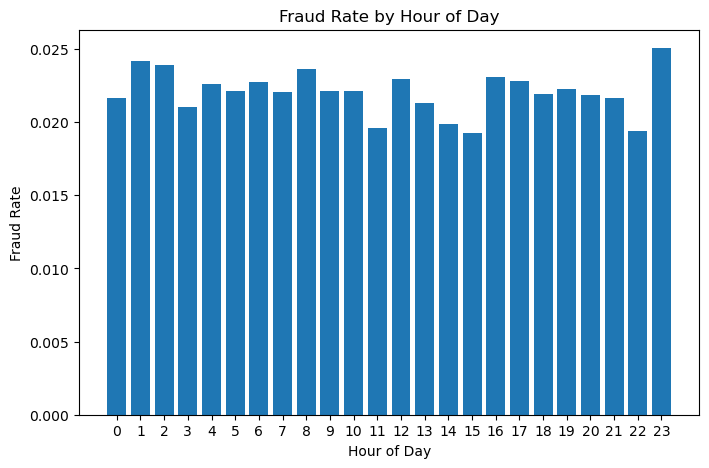

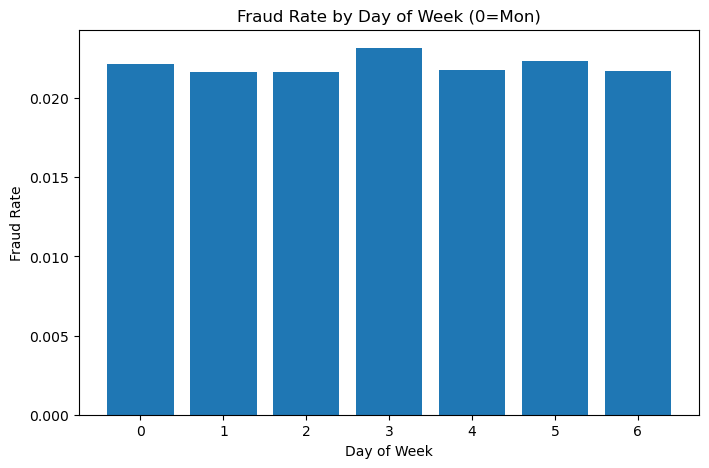

In [14]:
if "transaction_time" in df.columns:
    df["transaction_time"] = pd.to_datetime(df["transaction_time"], errors="coerce")

    df["hour"] = df["transaction_time"].dt.hour
    df["dayofweek"] = df["transaction_time"].dt.dayofweek

    hour_stats = (
        df.groupby("hour")["is_fraud"]
          .mean()
          .rename("fraud_rate")
          .reset_index()
    )

    plt.figure()
    plt.bar(hour_stats["hour"], hour_stats["fraud_rate"])
    plt.title("Fraud Rate by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel("Fraud Rate")
    plt.xticks(range(0, 24))
    plt.show()

    dow_stats = (
        df.groupby("dayofweek")["is_fraud"]
          .mean()
          .rename("fraud_rate")
          .reset_index()
    )

    plt.figure()
    plt.bar(dow_stats["dayofweek"], dow_stats["fraud_rate"])
    plt.title("Fraud Rate by Day of Week (0=Mon)")
    plt.xlabel("Day of Week")
    plt.ylabel("Fraud Rate")
    plt.xticks(range(0, 7))
    plt.show()
else:
    print("Column 'transaction_time' not found in the dataset.")

## Correlation Matrix (Numeric Features)

Numeric columns for correlation: ['transaction_id', 'user_id', 'account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag', 'shipping_distance_km', 'is_fraud', 'hour', 'dayofweek']


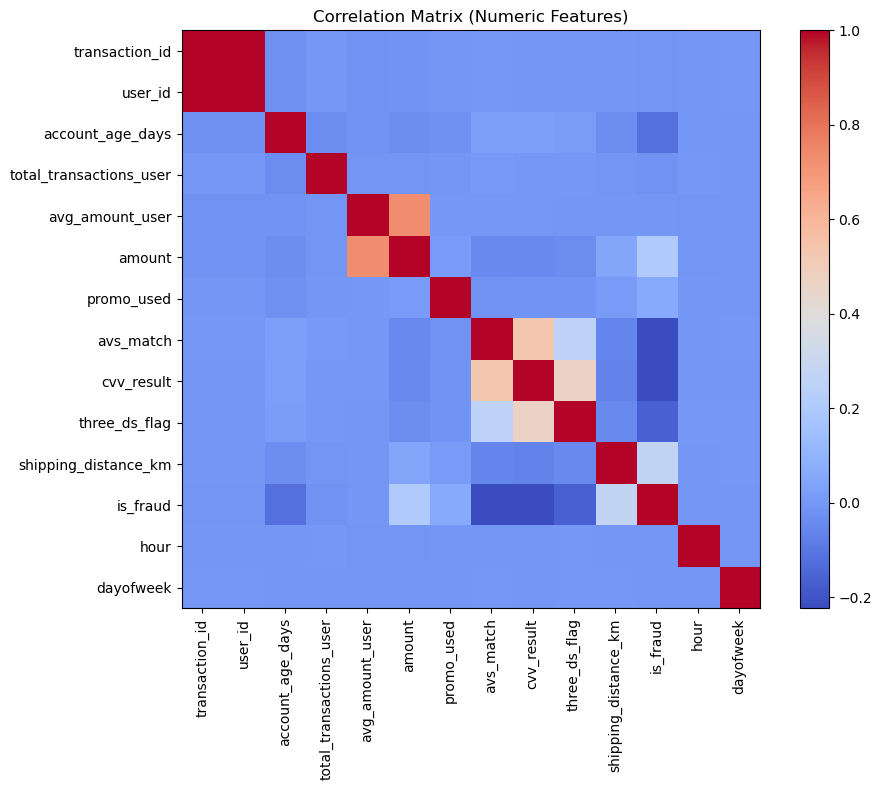

In [15]:
numeric_cols_corr = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns for correlation:", numeric_cols_corr)

corr = df[numeric_cols_corr].corr()

plt.figure(figsize=(10, 8))
im = plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(im)
plt.xticks(range(len(numeric_cols_corr)), numeric_cols_corr, rotation=90)
plt.yticks(range(len(numeric_cols_corr)), numeric_cols_corr)
plt.title("Correlation Matrix (Numeric Features)")
plt.tight_layout()
plt.show()

# Preprocessing and Feature Engineering

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
print("Initial shape:", df.shape)
display(df.head())

Initial shape: (299695, 19)


,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud,hour,dayofweek
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06 04:09:39+00:00,370.95,0,4,5
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09 20:13:47+00:00,149.62,0,20,1
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12 06:20:11+00:00,164.08,0,6,4
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15 17:00:04+00:00,397.40,0,17,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17 01:27:31+00:00,935.28,0,1,2


## 1. Time-based Feature Engineering

In [18]:
if "transaction_time" in df.columns:
    df["transaction_time"] = pd.to_datetime(df["transaction_time"], errors="coerce")
    df["hour"] = df["transaction_time"].dt.hour
    df["dayofweek"] = df["transaction_time"].dt.dayofweek

    df = df.drop(columns=["transaction_time"])
else:
    print("Column 'transaction_time' not found. Skipping time feature engineering.")

print("Columns after time feature engineering:")
print(df.columns.tolist())

Columns after time feature engineering:
['transaction_id', 'user_id', 'account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount', 'country', 'bin_country', 'channel', 'merchant_category', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag', 'shipping_distance_km', 'is_fraud', 'hour', 'dayofweek']


## 2. Dropping Identifier Columns

In [19]:
id_cols = []
for col in ["transaction_id", "user_id"]:
    if col in df.columns:
        id_cols.append(col)

if id_cols:
    df = df.drop(columns=id_cols)
    print("Dropped ID columns:", id_cols)
else:
    print("No ID columns ('transaction_id', 'user_id') found to drop.")

print("Columns after dropping IDs:")
print(df.columns.tolist())

Dropped ID columns: ['transaction_id', 'user_id']
Columns after dropping IDs:
['account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount', 'country', 'bin_country', 'channel', 'merchant_category', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag', 'shipping_distance_km', 'is_fraud', 'hour', 'dayofweek']


## 3. Missing Values Check

In [20]:
missing = df.isna().sum()
print("Missing values per column:")
print(missing)

print("\nAny missing values? ->", missing.sum() > 0)

Missing values per column:
account_age_days           0
total_transactions_user    0
avg_amount_user            0
amount                     0
country                    0
bin_country                0
channel                    0
merchant_category          0
promo_used                 0
avs_match                  0
cvv_result                 0
three_ds_flag              0
shipping_distance_km       0
is_fraud                   0
hour                       0
dayofweek                  0
dtype: int64

Any missing values? -> False


## 4. Define Features (X) and Target (y)

In [21]:
target_col = "is_fraud"

y = df[target_col]
X = df.drop(columns=[target_col])

print("Feature columns:", X.columns.tolist())
print("\nX shape:", X.shape)
print("y shape:", y.shape)

Feature columns: ['account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount', 'country', 'bin_country', 'channel', 'merchant_category', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag', 'shipping_distance_km', 'hour', 'dayofweek']

X shape: (299695, 15)
y shape: (299695,)


## 5. Train–Test Split 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)
print("Train fraud rate:", y_train.mean())
print("Test fraud rate:", y_test.mean())

Train shape: (239756, 15) | Test shape: (59939, 15)
Train fraud rate: 0.02206409850014181
Test fraud rate: 0.022055756685964063


## 6. Identify Numeric and Categorical Feature Columns

In [23]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: ['account_age_days', 'total_transactions_user', 'avg_amount_user', 'amount', 'promo_used', 'avs_match', 'cvv_result', 'three_ds_flag', 'shipping_distance_km', 'hour', 'dayofweek']
Categorical features: ['country', 'bin_country', 'channel', 'merchant_category']


## 7. Preprocessing Pipeline

In [24]:
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(
    handle_unknown="ignore",
    sparse_output=False
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop"
)

print(preprocessor)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['account_age_days', 'total_transactions_user',
                                  'avg_amount_user', 'amount', 'promo_used',
                                  'avs_match', 'cvv_result', 'three_ds_flag',
                                  'shipping_distance_km', 'hour',
                                  'dayofweek']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['country', 'bin_country', 'channel',
                                  'merchant_category'])])


# Modeling and Evaluation

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay,
    average_precision_score,
    PrecisionRecallDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

## Define Models with Pipelines

In [40]:
log_reg_clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(
            max_iter=1000,
            class_weight="balanced",
            n_jobs=-1
        ))
    ]
)

rf_clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=200,
            random_state=42,
            class_weight="balanced",
            n_jobs=-1
        ))
    ]
)

log_reg_clf
rf_clf

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [32]:
log_reg_clf.fit(X_train, y_train)

rf_clf.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Evaluation Helper Function

In [41]:
def evaluate_model(name, model, X_test, y_test):
    print(f"{name}")
    
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec_fraud = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
    rec_fraud = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    f1_fraud = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
    
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)
    
    print(f"accuracy: {acc}")
    print(f"precision (fraud class): {prec_fraud}")
    print(f"recall (fraud class): {rec_fraud}")
    print(f"f1-score (fraud class): {f1_fraud}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"PR-AUC (average precision): {pr_auc}")
    
    cm = confusion_matrix(y_test, y_pred)
    print("confusion matrix:")
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure()
    disp.plot()
    plt.title(f"{name}: Confusion Matrix")
    plt.show()
    
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"{name}: ROC Curve")
    plt.show()
    
    PrecisionRecallDisplay.from_predictions(y_test, y_proba)
    plt.title(f"{name}: Precision-Recall Curve")
    plt.show()


Logistic Regression
accuracy: 0.8901716745357781
precision (fraud class): 0.1501529458704615
recall (fraud class): 0.8540090771558245
f1-score (fraud class): 0.2554009727406402
ROC-AUC: 0.9397135878107368
PR-AUC (average precision): 0.5842366876289621
confusion matrix:
[[52227  6390]
 [  193  1129]]


<Figure size 800x500 with 0 Axes>

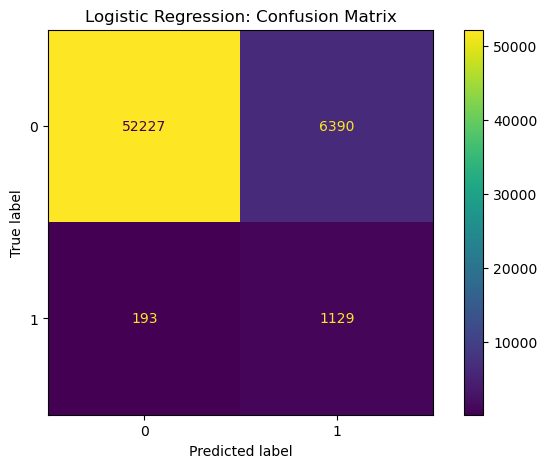

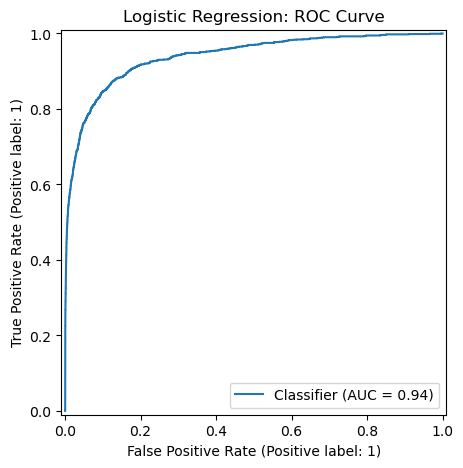

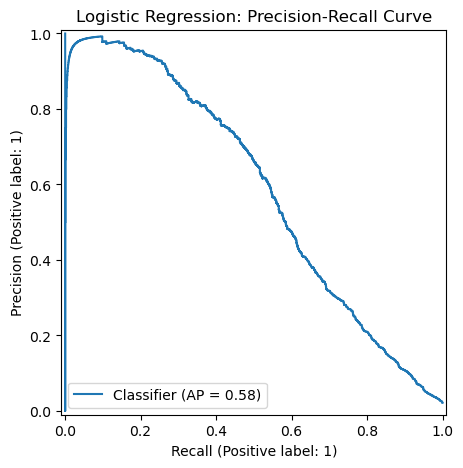


Random Forest
accuracy: 0.9908573716611889
precision (fraud class): 0.9348314606741573
recall (fraud class): 0.6293494704992436
f1-score (fraud class): 0.7522603978300181
ROC-AUC: 0.9667814506110682
PR-AUC (average precision): 0.8290114241601476
confusion matrix:
[[58559    58]
 [  490   832]]


<Figure size 800x500 with 0 Axes>

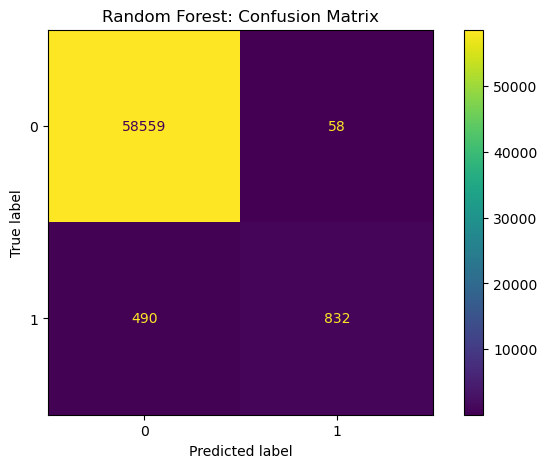

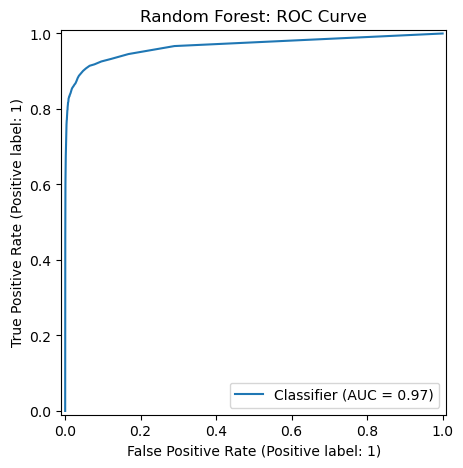

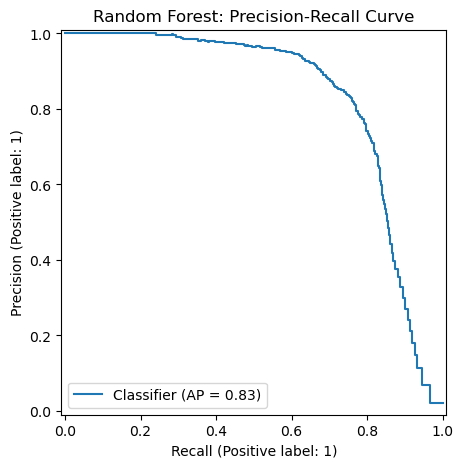

In [37]:
evaluate_model("Logistic Regression", log_reg_clf, X_test, y_test)
evaluate_model("Random Forest", rf_clf, X_test, y_test)